In [16]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

# Clustering and Distance Metrics 
### Based on Exam Topic Ideas 2024 for Math Concepts for Developers @ SoftUni

## References

1. [math](https://numerics.mathdotnet.com/Distance)
    + MathJax equations with perfect notation
    + L1, L2, MSE

2. [distance-metrics-euclidean-manhattan-minkowski-oh](https://www.kdnuggets.com/2023/03/distance-metrics-euclidean-manhattan-minkowski-oh.html)
    + Properties of Distance Metrics
    + 2d plots
    + python calculations

3. [types-of-distance-metrics-in-machine-learning](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)
    + Hamming Distance (categorical)
    - bad visualisations 
    - bad notation

4. [Metric space - wiki 4 ever](https://en.wikipedia.org/wiki/Metric_space)

5. [7-important-distance-metrics-every-data-scientist-should-know](https://medium.com/geekculture/7-important-distance-metrics-every-data-scientist-should-know-11e1b0b2ebe3)

## Helper functions

In [186]:
def set_coordinate_system(
        ax = None,
        x_min = 0,
        x_max = 6,
        y_min = 0,
        y_max = 6,
        arrowhead_offset = 0.1,
        o_offset = -0.4,
        ):
    """
    Sets aspect ratio, spines and ticks of an axis to accurately visualize two-dimensional Cartesian coordinate system.
    """
    ax = ax or plt.gca()
    
    ax.set_aspect("equal")

    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_xlabel("x", loc = "right")
    ax.set_ylabel("y", loc = "top", rotation = 0)

    ax.set_xlim(x_min - 1, x_max)
    ax.set_ylim(y_min - 1, y_max)

    ax.set_xticks([x for x in range(x_min, x_max) if x!=0])
    ax.set_yticks([y for y in range(y_min, y_max) if y!=0])

    ax.plot(x_max - arrowhead_offset, 0, '>k')
    ax.plot(0, y_max - arrowhead_offset, '^k')

    ax.annotate(text="O", xy = [0,0], xytext = [o_offset, o_offset])

    return ax
        

In [187]:
def plot_contours(
        vectorized_distance_function,
        ax = None,
        x_min = 0,
        x_max = 6,
        y_min = 0,
        y_max = 6,
        delta = 0.25,
        ):
        
    x = np.arange(x_min, x_max, delta)
    y = np.arange(y_min, y_max, delta)
    X, Y = np.meshgrid(x, y)
    Z = vectorized_distance_function(X, Y)

    ax = ax or plt.gca()

    ax.contourf(X, Y, Z, cmap = "GnBu_r")

    set_coordinate_system(
        ax=ax,
        x_min = x_min,
        x_max = x_max,
        y_min = y_min,
        y_max = y_max,
        )

    return ax


## Clustering Analysis. How Different Metrics Affect Clustering Results
One important application of linear algebra is to calculate distances between two points. There are many different ways to calculate a distance. The one which is probably most familiar to you is the **Euclidean distance**. In 2D space, given points $A (x_A; y_A)$ and $B(x_B; y_B)$, the distance is 
$$ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$

There are many more definitions of distance (see for example "taxicab distance").

Many algorithms in data processing and machine learning depend on calculating distances, mainly for calculating errors. A class of algorithms which is based on distances is called **cluster analysis**. Explore what cluster analysis is, and how different distance metrics (e.g. Eucledian and its derivate metrics, taxicab, hexagonal, octagonal, etc.) affect the quality of clustering. Of course, the type of metric you're going to use depends mostly on the data. Explore different scenarios and see why one is better than the other in a particular case.

* What are clusters of points? Why does real-world data tend to clusterize?
* What is clustering analysis? (Optional: What is unsupervised learning?)
* Provide examples of clustering analysis in 2D
* How are clusters defined?
* What is k-means clustering? Why does it converge?
* How does k-means depend on the initialization?
* How can we reduce the dependency on the initialization?
* What is agglomerative clustering (also called hierarchical clustering)?
* Implement (or use a ready-made implementation) k-means and agglomerative clustering
* The algorithms heavily depend on calculating distances between points. Show the results first using the Euclidean metric
* Use another metric (or several other metrics). Compare the results
* Use a custom metric. For example, this might be a function defined manually
* In which cases is a custom metric applicable?
* Apply clustering analysis for a real-world scenario. Some applications include social graphs (relations among people) of all sorts, connected crimes and classification.
* Use different distance metrics on the same dataset. How does it affect the data in general?

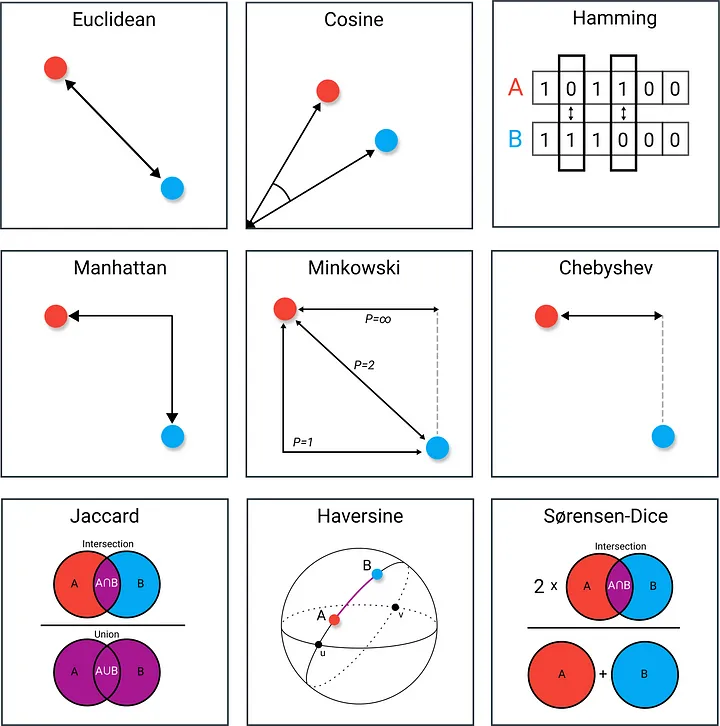

[9 distance metrics image source](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)

### Byte-sized math cookies

## Distance Metrics

A metric or distance function is a function 
$d(x,y)$ 
that defines the distance between elements of a set as a non-negative real number. If the distance is zero, both elements are equivalent under that specific metric. Distance functions thus provide a way to measure how close two elements are, where elements do not have to be numbers but can also be vectors, matrices or arbitrary objects. Distance functions are often used as error or cost functions to be minimized in an optimization problem.

There are multiple ways to define a metric on a set. A typical distance for real numbers is the absolute difference, 
$d : (x, y) \mapsto |x-y|$.
 But a scaled version of the absolute difference, or even 
$ d(x, y) = \begin{cases} 0 & \text{if } x = y \\ 1 & \text{if } x \ne y \end{cases}  $ 
are valid metrics as well. Every normed vector space induces a distance given by 
$ d(\vec x, \vec y) = \|\vec x - \vec y\| $.

### Examples

In [188]:
a = [1, 5]
b = [5, 2]

x, y = zip(a, b)

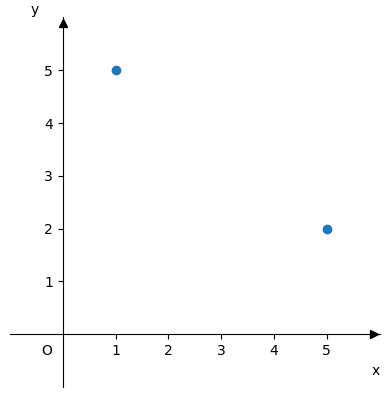

In [189]:
ax = set_coordinate_system()
ax.scatter(x, y)
plt.show()

In [201]:
def minkowski_distance_to_o(x, y):
    return distance.minkowski([x, y], [0, 0], p = 30)

minkowski_distance_to_o = np.vectorize(minkowski_distance_to_o)

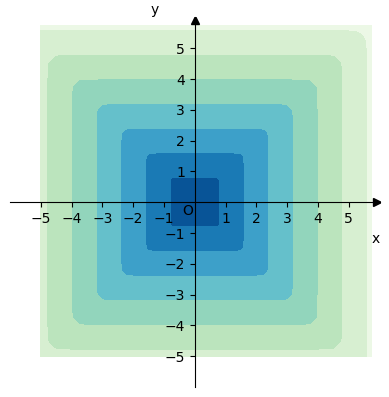

In [202]:
ax = plot_contours(minkowski_distance_to_o, x_min=-5, y_min=-5)

plt.show()

### Minkowski Distance

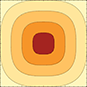 [image source](https://numerics.mathdotnet.com/Distance#Canberra-Distance)

The Minkowski distance is the generalized $L_p$-norm of the difference. The contour plot on the left demonstrates the case of p=3.
$$ d_{\mathbf{p}} : (x, y) \mapsto \|x-y\|_p = \bigg(\sum_{i=1}^{n} |x_i-y_i|^p\bigg)^\frac{1}{p} $$

In [3]:
# scipy.spatial
distance.minkowski([1,2], [2,3])

1.4142135623730951

#### Euclidean Distance

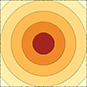 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The euclidean distance is the $L_2$-norm of the difference, a special case of the Minkowski distance with p=2. It is the natural distance in a geometric interpretation.
$$ d_{\mathbf{2}} : (x, y) \mapsto \|x-y\|_2 = \sqrt{d_{\mathbf{SSD}}} = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2} $$

#### Manhattan Distance

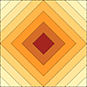 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The Manhattan distance is the $L_1$-norm of the difference, a special case of the Minkowski distance with $p=1$ and equivalent to the sum of absolute difference.
$$ d_{\mathbf{1}} \equiv d_{\mathbf{SAD}} : (x, y) \mapsto \|x-y\|_1 = \sum_{i=1}^{n} |x_i-y_i| $$

##### Canberra Distance

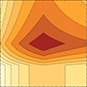 [image source](https://numerics.mathdotnet.com/Distance#Canberra-Distance)

The Canberra distance is a weighted version of the Manhattan distance, introduced and refined 1967 by Lance, Williams and Adkins. It is often used for data scattered around an origin, as it is biased for measures around the origin and very sensitive for values close to zero.
$$ d_{\mathbf{CAD}} : (x, y) \mapsto \sum_{i=1}^{n} \frac{|x_i-y_i|}{|x_i|+|y_i|} $$

#### Chebyshev (Chessboard) Distance 


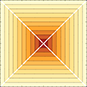 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The Chebyshev distance is the $L_\infty$-norm of the difference, a special case of the Minkowski distance where p goes to infinity. It is also known as Chessboard distance.
$$ d_{\mathbf{\infty}} : (x, y) \mapsto \|x-y\|_\infty = \lim_{p \rightarrow \infty}\bigg(\sum_{i=1}^{n} |x_i-y_i|^p\bigg)^\frac{1}{p} = \max_{i} |x_i-y_i| $$

### Cosine Distance

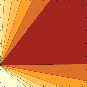 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The cosine distance contains the dot product scaled by the product of the Euclidean distances from the origin. It represents the angular distance of two vectors while ignoring their scale.

$$ d_{\mathbf{cos}} : (x, y) \mapsto 1-\frac{\langle x, y\rangle}{\|x\|_2\|y\|_2} = 1-\frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2}\sqrt{\sum_{i=1}^{n} y_i^2}} $$

### Pearson's Distance

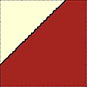 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The Pearson distance is a correlation distance based on Pearson's product-momentum correlation coefficient of the two sample vectors. Since the correlation coefficient falls between [-1, 1], the Pearson distance lies in [0, 2] and measures the linear relationship between the two vectors.

$$ d_{\mathbf{Pearson}} : (x, y) \mapsto 1 - \mathbf{Corr}(x, y) $$

### Hamming Distance

The hamming distance represents the number of entries in the two sample vectors which are different. It is a fundamental distance measure in information theory but less relevant in non-integer numerical problems.